<a href="https://colab.research.google.com/github/abhidhawale/MachineLearningProjects/blob/master/RandomForestClassifier_OnlineShoppers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Implement Random Forest algorithm on the "OnlineShoppers" dataset

1. The target variable is **Revenue**

2. Split the data into training and testing parts :  80% for training and 20% for testing.

3. Check the Accuracy and the Confusion Matrix for the fitted model

4. Make prediction of **Revenue** for feature matrix :

            [0.0,0.0,0.0,0.0,0.1,0.0,0.5,0.2,0.0,0.0,2,1,1,1,1,2,0] 

In [ ]:
import pandas as pd
import seaborn as sb

df = pd.read_csv('/content/dataset-37-1-online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


###Preprocessing

In [ ]:
df.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [ ]:
for i in range(0,8):
  df.iloc[:,i] = df.iloc[:,i].fillna(df.iloc[:,i].median())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_val = df[['Month','VisitorType','Weekend','Revenue']]
le = LabelEncoder() 
for i in cat_val:
    df[i] = le.fit_transform(cat_val[i])

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


### Splitting of data into Traning and Test sets

In [ ]:
from sklearn.model_selection import train_test_split

X=df.drop('Revenue', axis=1) 
y=df['Revenue'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###Fitting model on training data

In [ ]:
from sklearn.ensemble import RandomForestClassifier
mod = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 42)

result = mod.fit(X_train, y_train)

In [ ]:
pred = result.predict(X_test)
pred

array([0, 0, 1, ..., 0, 0, 0])

###Checking accuracy, classification report and plotting confusion matrix for the predictions

In [ ]:
from sklearn import metrics
print("Classification report: \n", metrics.classification_report(y_test, pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.74      0.52      0.61       411

    accuracy                           0.89      2466
   macro avg       0.82      0.74      0.77      2466
weighted avg       0.88      0.89      0.88      2466



In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, pred))

Accuracy: 0.889294403892944


In [ ]:
conf_mat = metrics.confusion_matrix(y_test, pred)
conf_df = pd.DataFrame(conf_mat, index=['Actual 0', 'Actual 1'], columns=['Actual 0', 'Actual 1'])
conf_df

,Actual 0,Actual 1
Actual 0,1979,76
Actual 1,197,214


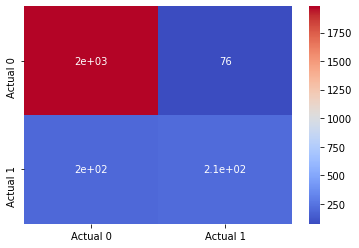

In [ ]:
sb.heatmap(conf_df, cmap='coolwarm', annot=True)

###Deploying model

In [ ]:
new_pred = result.predict([[0.0,0.0,0.0,0.0,0.1,0.0,0.5,0.2,0.0,0.0,2,1,1,1,1,2,0]])
new_pred

array([0])